In [92]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import scipy.fftpack
import csv
import os

## Read and Plot the whole TCSV

In [93]:
# list to store file lines
lines = []
# read file
with open(r"TA960.tcsv", 'r') as fp:
    # read an store all lines into list
    lines = fp.readlines()

# Write file
with open(r"TA960_2.tcsv", 'w') as fp:
    # iterate each line
    for number, line in enumerate(lines):
        # delete line 5 and 8. or pass any Nth line you want to remove
        # note list index starts from 0
        if number not in [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]:
            fp.write(line)

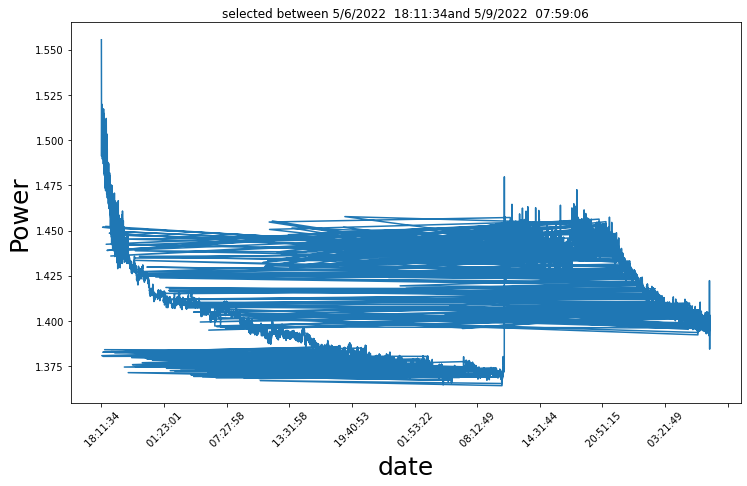

In [94]:
dataset = pd.read_csv('TA960_2.tcsv', sep=";",header = None)
accData=dataset.values.tolist()
#accData=np.asarray([np.asarray(elem) for elem in accData])
dataset['A'] = dataset[0] 
dataset['B'] = dataset[1] 
dataset['C'] = dataset[2] 
C0 = np.array(dataset['A'])
C1 = np.array(dataset['B'])
C2 = np.array(dataset['C'])
#Ploting
figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] =  [12,7]
plt.xticks(rotation=45)
ax.plot(C1,C2)
ax.tick_params(labelsize=10)
ax.set_xlabel('date',fontsize=25)
ax.set_ylabel(r'Power',fontsize=25)
ax.set_xticks(np.arange(0, len(C1)+1, len(C1)/10));
ax.set_title('selected between ' + C0[0] + ' '+ C1[0] + 'and '+ C0[len(C0)-1] + ' '+ C1[len(C1)-1] );
#ax.set_title('selected between ' + dataset[0][0] + ' '+ dataset[1][0] + 'and '+ dataset[0][len(dataset[0])-1] + ' '+ dataset[1][len(dataset[1])-1] );

## Plot the Selected TCSV

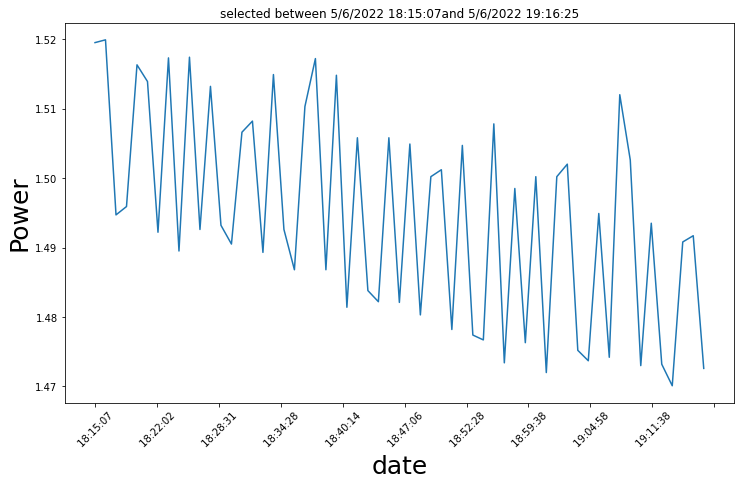

In [95]:
dataset['D'] = pd.to_datetime(dataset['A'] + ' ' + dataset['B'])

start_date = "5/6/2022 18:15:07" #Provide your start dateTime as input here in the same exact format
end_date = "5/6/2022 19:16:25" #Provide your end dateTime as input here in the same exact format

mask = (dataset['D'] >= start_date) & (dataset['D'] <= end_date)

selected_dataset = dataset.loc[mask]

C0_selected = np.array(selected_dataset['A'])
C1_selected = np.array(selected_dataset['B'])
C2_selected = np.array(selected_dataset['C'])
figure,ax=plt.subplots(1)
plt.rcParams['figure.figsize'] =  [12,7]
plt.xticks(rotation=45)

ax.plot(C1_selected,C2_selected)
ax.tick_params(labelsize=10)
ax.set_xlabel('date',fontsize=25)
ax.set_ylabel(r'Power',fontsize=25)
ax.set_xticks(np.arange(0, len(C1_selected)+1, len(C1_selected)/10));
ax.set_title('selected between '+start_date +'and '+ end_date);


In [96]:
os.remove('TA960_2.tcsv')

In [ ]:
def rms(values):
    return np.sqrt(sum(values**2)/len(values))